## **Exercise: Breast Cancer Classification**

**Objective**: Build a machine learning model to classify breast cancer tumors as malignant or benign based on features extracted from images of breast tissues.

In [100]:
# 01. IMPORT LIBRARIES : Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
# 02. LOAD THE DATASET : Load the dataset from scikit-learn and create a DataFrame.

#Load dataset
breastcancer = load_breast_cancer()
X = breastcancer.data #Features
Y = breastcancer.target #Target Variable

#Create a DataFrame for better visualization
df = pd.DataFrame(data=X,columns=breastcancer.feature_names)
df['Result']=Y

In [102]:
# 03. EXPLORE THE DATASET : Explore the dataset to understand its structure and distribution.

#Display first few rows of the dataset and basic statistics
print(df.head())
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [103]:
# 04. PREPROCESS THE DATA: Split the data into training and testing sets, and scale the features.

#Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [104]:
# 05. TRAIN A LOGISTIC REGRESSION MODEL: Train a logistic regression model on the data

#Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)


LogisticRegression(random_state=42)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Class 0: Represents malicious tumors
Class 1: Represents benign tumors (non-cancerous)


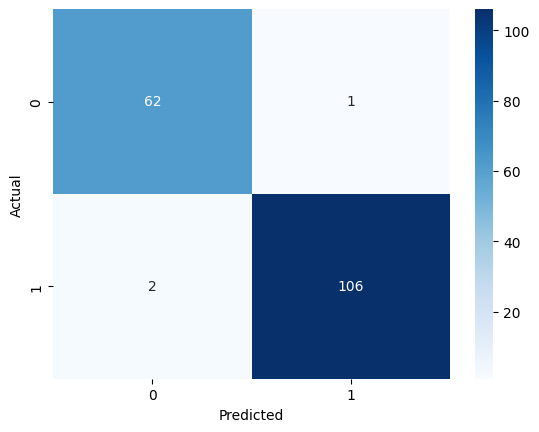

In [105]:
#06. EVALUTE THE MODEL: Evaluate the model's performance on the test set.

#Predict on the test set
Y_pred = model.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: { accuracy:.2f}')

#Classification Report
print(classification_report(Y_test,Y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show
print('Class 0: Represents malicious tumors')
print('Class 1: Represents benign tumors (non-cancerous)')